In [1]:
%matplotlib notebook

In [2]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [3]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [housing_data.sample(div) for x in range(0,nsamples)]

In [6]:
# Calculate means
means = [s['MEDV'].mean() for s in samples]
# Calculate standard error on means
sems = [sem(s['MEDV']) for s in samples]

<IPython.core.display.Javascript object>


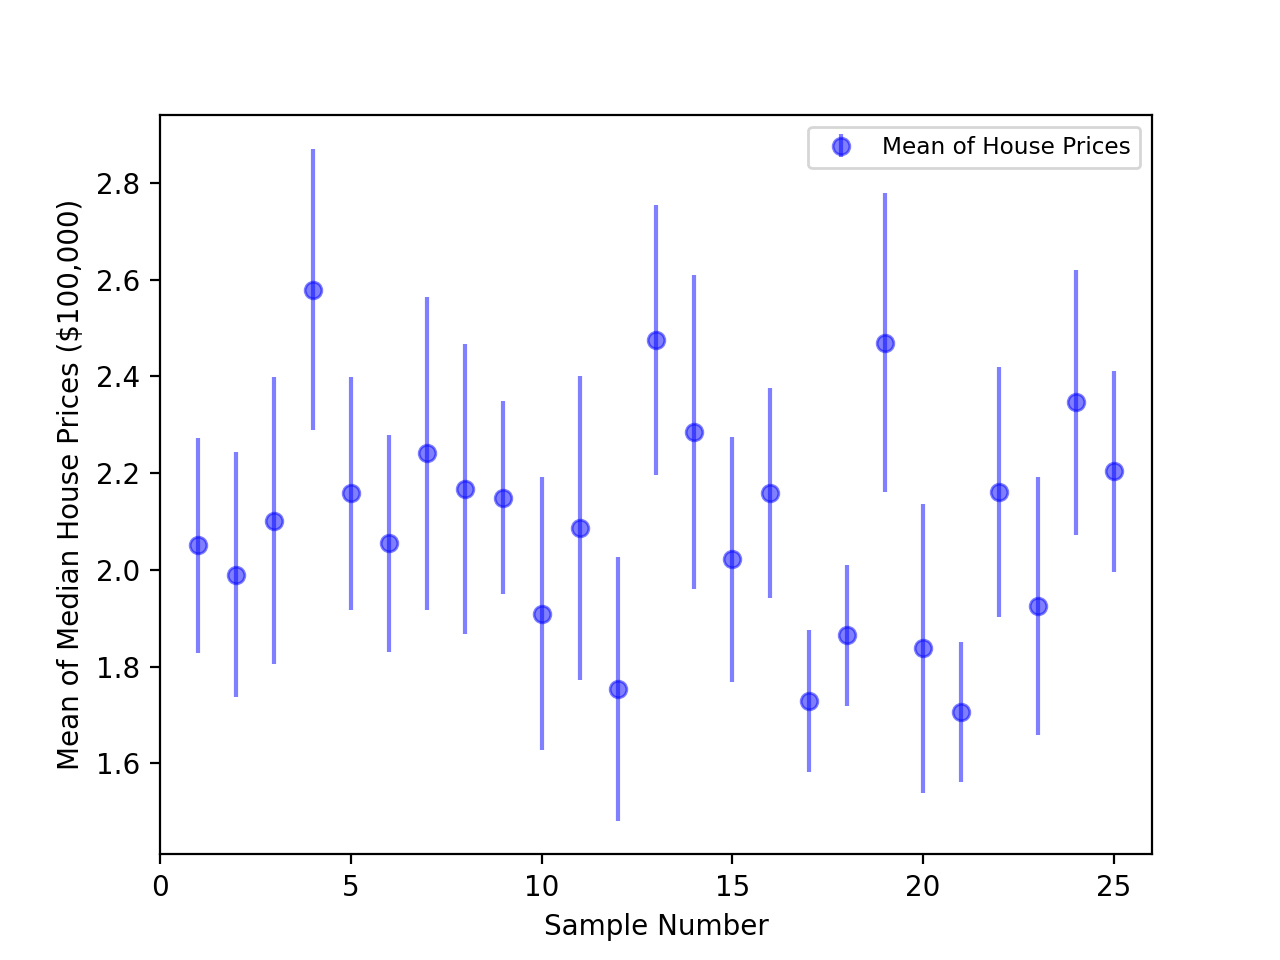

In [7]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($100,000)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [8]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 0.18002249612829288


In [9]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 0.1449009353062691
The sample with the smallest SEM is sample 21


In [10]:
# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index]['MEDV'].mean()}")
print(f"The mean of the population data set is {housing_data['MEDV'].mean()}")

The mean of the sample 5 is 1.7055999999999998
The mean of the population data set is 2.0685581690891843
